In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.metrics import recall_score, f1_score


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.5560 - loss: 1.2968
Test Accuracy: 0.6028571724891663
Test Loss: 1.1617753505706787
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step


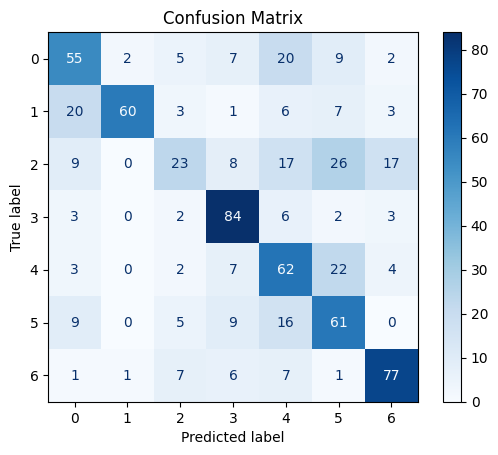

Classification Report:
              precision    recall  f1-score   support

       angry       0.55      0.55      0.55       100
     disgust       0.95      0.60      0.74       100
        fear       0.49      0.23      0.31       100
       happy       0.69      0.84      0.76       100
     neutral       0.46      0.62      0.53       100
         sad       0.48      0.61      0.54       100
    surprise       0.73      0.77      0.75       100

    accuracy                           0.60       700
   macro avg       0.62      0.60      0.60       700
weighted avg       0.62      0.60      0.60       700

Test Recall: 0.6028571428571429
Test F1-Score: 0.5954933300842778


In [46]:

# Load the trained model
model = load_model('saved_models/CNN_Cenario1.keras')

base_path = "facial_emotion_dataset/"
train_dir = os.path.join(base_path, "train")
val_dir = os.path.join(base_path, "validation")

# Function to list files and their labels
def listar_arquivos_e_etiquetas(diretorio_base, num_samples):
    data = []
    for pasta in os.listdir(diretorio_base):
        pasta_path = os.path.join(diretorio_base, pasta)
        if os.path.isdir(pasta_path):
            for arquivo in os.listdir(pasta_path)[:num_samples]:
                arquivo_path = os.path.join(pasta_path, arquivo)
                data.append((arquivo_path, pasta))
    return data

num_samples = 100  # Specify the number of samples
val_files = listar_arquivos_e_etiquetas(val_dir, num_samples)
df = pd.DataFrame(val_files, columns=['Caminho', 'Etiqueta'])

img_size = 48  # Define the image size as needed
batch_size = 32  # Define batch size as needed

# Function to load images and labels
def load_images_and_labels(file_paths, img_size):
    images = []
    labels = []
    for file_path, label in zip(file_paths['Caminho'], file_paths['Etiqueta']):
        # Load image using OpenCV and resize it to the desired size
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (img_size, img_size))
        # Normalize pixel values to the range [0, 1]
        image = image / 255.0
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels(df, img_size)

# Convert string labels to integer labels
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)

# Convert integer labels to one-hot encoded vectors
num_classes = len(np.unique(labels))
one_hot_labels = to_categorical(integer_labels, num_classes=num_classes)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(images, one_hot_labels)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Predict labels for the test data
predicted_labels = np.argmax(model.predict(images), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(integer_labels, predicted_labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(integer_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Calculate recall and F1-score for the test set
test_recall = recall_score(integer_labels, predicted_labels, average='weighted')
test_f1_score = f1_score(integer_labels, predicted_labels, average='weighted')

# Print recall and F1-score for the test set
print(f"Test Recall: {test_recall}")
print(f"Test F1-Score: {test_f1_score}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.0713 - loss: 2.0030
Test Accuracy: 0.14571428298950195
Test Loss: 1.9832375049591064
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step


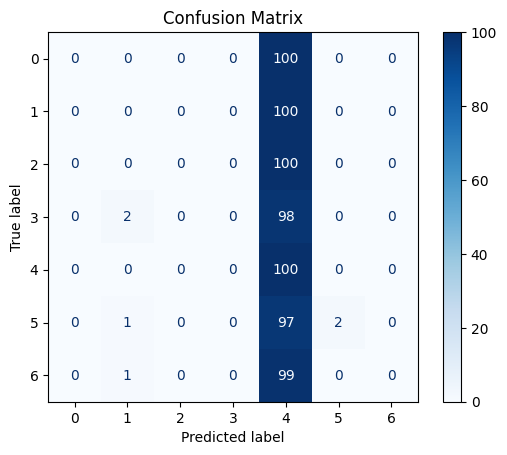

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       100
     disgust       0.00      0.00      0.00       100
        fear       0.00      0.00      0.00       100
       happy       0.00      0.00      0.00       100
     neutral       0.14      1.00      0.25       100
         sad       1.00      0.02      0.04       100
    surprise       0.00      0.00      0.00       100

    accuracy                           0.15       700
   macro avg       0.16      0.15      0.04       700
weighted avg       0.16      0.15      0.04       700

Test Recall: 0.1457142857142857
Test F1-Score: 0.04158640786289327


c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [47]:
# Load the trained model
model = load_model('saved_models/CNN_Cenario2.keras')

base_path = "facial_emotion_dataset/"
train_dir = os.path.join(base_path, "train")
val_dir = os.path.join(base_path, "validation")

# Function to list files and their labels
def listar_arquivos_e_etiquetas(diretorio_base, num_samples):
    data = []
    for pasta in os.listdir(diretorio_base):
        pasta_path = os.path.join(diretorio_base, pasta)
        if os.path.isdir(pasta_path):
            for arquivo in os.listdir(pasta_path)[:num_samples]:
                arquivo_path = os.path.join(pasta_path, arquivo)
                data.append((arquivo_path, pasta))
    return data

num_samples = 100  # Specify the number of samples
val_files = listar_arquivos_e_etiquetas(val_dir, num_samples)
df = pd.DataFrame(val_files, columns=['Caminho', 'Etiqueta'])

img_size = 48  # Define the image size as needed
batch_size = 32  # Define batch size as needed

# Function to load images and labels
def load_images_and_labels(file_paths, img_size):
    images = []
    labels = []
    for file_path, label in zip(file_paths['Caminho'], file_paths['Etiqueta']):
        # Load image using OpenCV and resize it to the desired size
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (img_size, img_size))
        # Normalize pixel values to the range [0, 1]
        image = image / 255.0
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels(df, img_size)

# Convert string labels to integer labels
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)

# Convert integer labels to one-hot encoded vectors
num_classes = len(np.unique(labels))
one_hot_labels = to_categorical(integer_labels, num_classes=num_classes)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(images, one_hot_labels)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Predict labels for the test data
predicted_labels = np.argmax(model.predict(images), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(integer_labels, predicted_labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(integer_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Calculate recall and F1-score for the test set
test_recall = recall_score(integer_labels, predicted_labels, average='weighted')
test_f1_score = f1_score(integer_labels, predicted_labels, average='weighted')

# Print recall and F1-score for the test set
print(f"Test Recall: {test_recall}")
print(f"Test F1-Score: {test_f1_score}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5583 - loss: 1.1171
Test Accuracy: 0.6000000238418579
Test Loss: 1.0366264581680298
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step


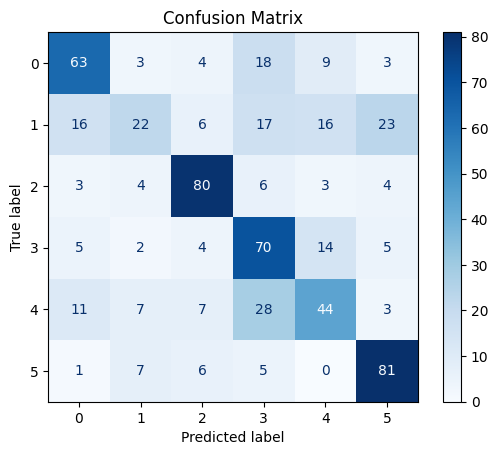

Classification Report:
              precision    recall  f1-score   support

       angry       0.64      0.63      0.63       100
        fear       0.49      0.22      0.30       100
       happy       0.75      0.80      0.77       100
     neutral       0.49      0.70      0.57       100
         sad       0.51      0.44      0.47       100
    surprise       0.68      0.81      0.74       100

    accuracy                           0.60       600
   macro avg       0.59      0.60      0.58       600
weighted avg       0.59      0.60      0.58       600

Test Recall: 0.6
Test F1-Score: 0.5826959606136018


In [48]:
# Load the trained model
model = load_model('saved_models/CNN_Cenario3.keras')

base_path = "facial_emotion_dataset/"
train_dir = os.path.join(base_path, "train")
val_dir = os.path.join(base_path, "validation")

# Function to list files and their labels
def listar_arquivos_e_etiquetas(diretorio_base, num_samples):
    data = []
    for pasta in os.listdir(diretorio_base):
        pasta_path = os.path.join(diretorio_base, pasta)
        if os.path.isdir(pasta_path):
            for arquivo in os.listdir(pasta_path)[:num_samples]:
                arquivo_path = os.path.join(pasta_path, arquivo)
                data.append((arquivo_path, pasta))
    return data

num_samples = 100  # Specify the number of samples
val_files = listar_arquivos_e_etiquetas(val_dir, num_samples)
df = pd.DataFrame(val_files, columns=['Caminho', 'Etiqueta'])
df = df[df['Etiqueta'] != 'disgust']

img_size = 48  # Define the image size as needed
batch_size = 32  # Define batch size as needed

# Function to load images and labels
def load_images_and_labels(file_paths, img_size):
    images = []
    labels = []
    for file_path, label in zip(file_paths['Caminho'], file_paths['Etiqueta']):
        # Load image using OpenCV and resize it to the desired size
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (img_size, img_size))
        # Normalize pixel values to the range [0, 1]
        image = image / 255.0
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels(df, img_size)

# Convert string labels to integer labels
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)

# Convert integer labels to one-hot encoded vectors
num_classes = len(np.unique(labels))
one_hot_labels = to_categorical(integer_labels, num_classes=num_classes)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(images, one_hot_labels)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Predict labels for the test data
predicted_labels = np.argmax(model.predict(images), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(integer_labels, predicted_labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(integer_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Calculate recall and F1-score for the test set
test_recall = recall_score(integer_labels, predicted_labels, average='weighted')
test_f1_score = f1_score(integer_labels, predicted_labels, average='weighted')

# Print recall and F1-score for the test set
print(f"Test Recall: {test_recall}")
print(f"Test F1-Score: {test_f1_score}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.6001 - loss: 1.1149
Test Accuracy: 0.6299999952316284
Test Loss: 1.046793818473816
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step


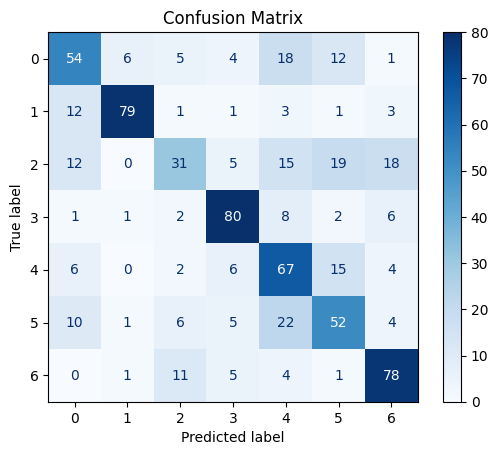

Classification Report:
              precision    recall  f1-score   support

       angry       0.57      0.54      0.55       100
     disgust       0.90      0.79      0.84       100
        fear       0.53      0.31      0.39       100
       happy       0.75      0.80      0.78       100
     neutral       0.49      0.67      0.57       100
         sad       0.51      0.52      0.51       100
    surprise       0.68      0.78      0.73       100

    accuracy                           0.63       700
   macro avg       0.63      0.63      0.62       700
weighted avg       0.63      0.63      0.62       700

Test Recall: 0.63
Test F1-Score: 0.6246571528322277


In [49]:

# Load the trained model
model = load_model('saved_models/CNN_Cenario4.keras')

base_path = "facial_emotion_dataset/"
train_dir = os.path.join(base_path, "train")
val_dir = os.path.join(base_path, "validation")

# Function to list files and their labels
def listar_arquivos_e_etiquetas(diretorio_base, num_samples):
    data = []
    for pasta in os.listdir(diretorio_base):
        pasta_path = os.path.join(diretorio_base, pasta)
        if os.path.isdir(pasta_path):
            for arquivo in os.listdir(pasta_path)[:num_samples]:
                arquivo_path = os.path.join(pasta_path, arquivo)
                data.append((arquivo_path, pasta))
    return data

num_samples = 100  # Specify the number of samples
val_files = listar_arquivos_e_etiquetas(val_dir, num_samples)
df = pd.DataFrame(val_files, columns=['Caminho', 'Etiqueta'])

img_size = 48  # Define the image size as needed
batch_size = 32  # Define batch size as needed

# Function to load images and labels
def load_images_and_labels(file_paths, img_size):
    images = []
    labels = []
    for file_path, label in zip(file_paths['Caminho'], file_paths['Etiqueta']):
        # Load image using OpenCV and resize it to the desired size
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (img_size, img_size))
        # Normalize pixel values to the range [0, 1]
        image = image / 255.0
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels(df, img_size)

# Convert string labels to integer labels
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)

# Convert integer labels to one-hot encoded vectors
num_classes = len(np.unique(labels))
one_hot_labels = to_categorical(integer_labels, num_classes=num_classes)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(images, one_hot_labels)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Predict labels for the test data
predicted_labels = np.argmax(model.predict(images), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(integer_labels, predicted_labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(integer_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Calculate recall and F1-score for the test set
test_recall = recall_score(integer_labels, predicted_labels, average='weighted')
test_f1_score = f1_score(integer_labels, predicted_labels, average='weighted')

# Print recall and F1-score for the test set
print(f"Test Recall: {test_recall}")
print(f"Test F1-Score: {test_f1_score}")


In [61]:
import tensorflow as tf
from keras.saving import register_keras_serializable

@register_keras_serializable()
def grayscale_to_rgb(x):
    x = tf.image.grayscale_to_rgb(x)
    return x

c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 74 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 523ms/step - accuracy: 0.3499 - loss: 1.5936
Test Accuracy: 0.40833333134651184
Test Loss: 1.5297961235046387
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 635ms/step


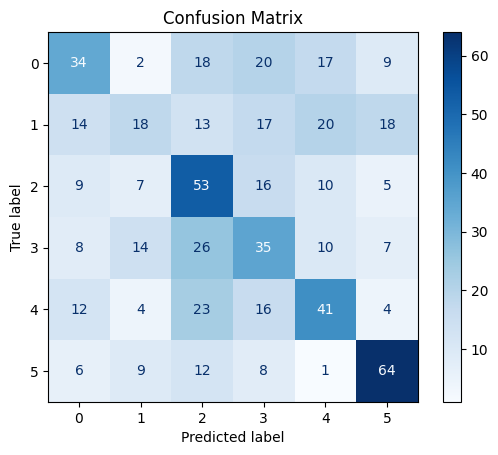

Classification Report:
              precision    recall  f1-score   support

       angry       0.41      0.34      0.37       100
        fear       0.33      0.18      0.23       100
       happy       0.37      0.53      0.43       100
     neutral       0.31      0.35      0.33       100
         sad       0.41      0.41      0.41       100
    surprise       0.60      0.64      0.62       100

    accuracy                           0.41       600
   macro avg       0.41      0.41      0.40       600
weighted avg       0.41      0.41      0.40       600

Test Recall: 0.4083333333333333
Test F1-Score: 0.3997684105199669


In [59]:
# Load the trained model
model = load_model('saved_models/VGGSemProcessamento.keras')

base_path = "facial_emotion_dataset/"
train_dir = os.path.join(base_path, "train")
val_dir = os.path.join(base_path, "validation")

# Function to list files and their labels
def listar_arquivos_e_etiquetas(diretorio_base, num_samples):
    data = []
    for pasta in os.listdir(diretorio_base):
        pasta_path = os.path.join(diretorio_base, pasta)
        if os.path.isdir(pasta_path):
            for arquivo in os.listdir(pasta_path)[:num_samples]:
                arquivo_path = os.path.join(pasta_path, arquivo)
                data.append((arquivo_path, pasta))
    return data

num_samples = 100  # Specify the number of samples
val_files = listar_arquivos_e_etiquetas(val_dir, num_samples)
df = pd.DataFrame(val_files, columns=['Caminho', 'Etiqueta'])
df = pd.DataFrame(val_files, columns=['Caminho', 'Etiqueta'])
df = df[df['Etiqueta'] != 'disgust']

img_size = 48  # Define the image size as needed
batch_size = 32  # Define batch size as needed

# Function to load images and labels
def load_images_and_labels(file_paths, img_size):
    images = []
    labels = []
    for file_path, label in zip(file_paths['Caminho'], file_paths['Etiqueta']):
        # Load image using OpenCV and resize it to the desired size
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (img_size, img_size))
        # Normalize pixel values to the range [0, 1]
        image = image / 255.0
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels(df, img_size)

# Convert string labels to integer labels
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)

# Convert integer labels to one-hot encoded vectors
num_classes = len(np.unique(labels))
one_hot_labels = to_categorical(integer_labels, num_classes=num_classes)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(images, one_hot_labels)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Predict labels for the test data
predicted_labels = np.argmax(model.predict(images), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(integer_labels, predicted_labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(integer_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Calculate recall and F1-score for the test set
test_recall = recall_score(integer_labels, predicted_labels, average='weighted')
test_f1_score = f1_score(integer_labels, predicted_labels, average='weighted')

# Print recall and F1-score for the test set
print(f"Test Recall: {test_recall}")
print(f"Test F1-Score: {test_f1_score}")

In [72]:
@register_keras_serializable()
def preprocess_vgg19(x):
    x = tf.image.grayscale_to_rgb(x)
    x = preprocess_input(x)
    return x

In [73]:
# Load the trained model
model = load_model('saved_models/VGGPreprocessado.keras')

base_path = "facial_emotion_dataset/"
train_dir = os.path.join(base_path, "train")
val_dir = os.path.join(base_path, "validation")

# Function to list files and their labels
def listar_arquivos_e_etiquetas(diretorio_base, num_samples):
    data = []
    for pasta in os.listdir(diretorio_base):
        pasta_path = os.path.join(diretorio_base, pasta)
        if os.path.isdir(pasta_path):
            for arquivo in os.listdir(pasta_path)[:num_samples]:
                arquivo_path = os.path.join(pasta_path, arquivo)
                data.append((arquivo_path, pasta))
    return data

num_samples = 100  # Specify the number of samples
val_files = listar_arquivos_e_etiquetas(val_dir, num_samples)
df = pd.DataFrame(val_files, columns=['Caminho', 'Etiqueta'])
df = pd.DataFrame(val_files, columns=['Caminho', 'Etiqueta'])
df = df[df['Etiqueta'] != 'disgust']

img_size = 48  # Define the image size as needed
batch_size = 32  # Define batch size as needed

# Function to load images and labels
def load_images_and_labels(file_paths, img_size):
    images = []
    labels = []
    for file_path, label in zip(file_paths['Caminho'], file_paths['Etiqueta']):
        # Load image using OpenCV and resize it to the desired size
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (img_size, img_size))
        # Normalize pixel values to the range [0, 1]
        image = image / 255.0
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels(df, img_size)

# Convert string labels to integer labels
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)

# Convert integer labels to one-hot encoded vectors
num_classes = len(np.unique(labels))
one_hot_labels = to_categorical(integer_labels, num_classes=num_classes)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(images, one_hot_labels)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Predict labels for the test data
predicted_labels = np.argmax(model.predict(images), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(integer_labels, predicted_labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(integer_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Calculate recall and F1-score for the test set
test_recall = recall_score(integer_labels, predicted_labels, average='weighted')
test_f1_score = f1_score(integer_labels, predicted_labels, average='weighted')

# Print recall and F1-score for the test set
print(f"Test Recall: {test_recall}")
print(f"Test F1-Score: {test_f1_score}")

NotImplementedError: Exception encountered when calling Lambda.call().

[1mWe could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.[0m

Arguments received by Lambda.call():
  • args=('<KerasTensor shape=(None, 48, 48, 1), dtype=float32, sparse=False, name=input_layer_10>',)
  • kwargs={'mask': 'None'}